## Data Loading

In [2]:
import pandas as pd
df = pd.read_csv("/Users/miguel/HaaS/Capstone/baseball.csv")
df['WP'] = (df['W'] / df['G']).round(3)
df['RD'] =  df['RS'] - df['RA']
df['Label'] = (df['WP'] > 0.5).astype(int)
df['PWP'] =  ((df['RS']^2) / ((df['RS']^2) + (df['RA']^2))).round(3)
df['PW'] = (df['PWP'] * df['G']).round(1)
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,WP,RD,Label,PWP,PW
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,0.500,46,0,0.515,83.4
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,0.580,100,1,0.538,87.2
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,0.574,7,1,0.502,81.3
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,0.426,-72,0,0.477,77.3
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,0.377,-146,0,0.448,72.6


## Oakland A's 2002 Season

Removing Oakland A's 2002 season for future analysis.

In [4]:
# Identify the index of rows to drop
index_to_drop = df[(df['Year'] == 2002) & (df['Team'] == 'OAK')].index
# Drop these rows from the DataFrame
df_dropped_oakland = df.drop(index_to_drop)

season = 2002
df_2002 = df[df['Year'] == season]
df_oakland = df_2002[df_2002['Team'] == 'OAK']
oakland_all_years = df[(df['Team'] == 'OAK') & (df['Year'] >= 2003)]

## Visualizing the Data

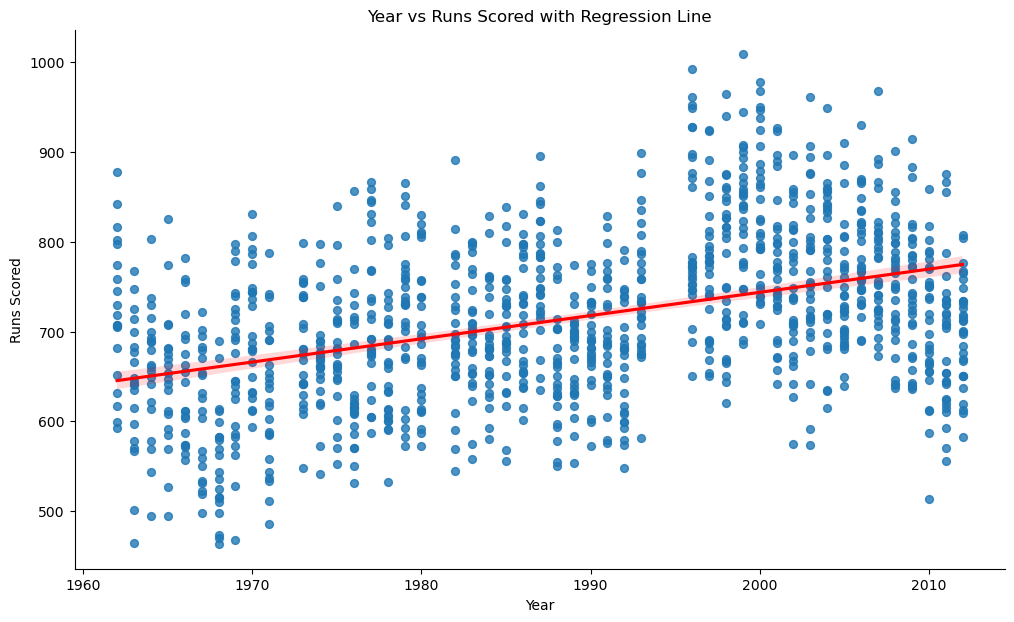

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

# Create the scatter plot with a regression line
plt.figure(figsize=(12, 7))
sns.regplot(x='Year', y='RS', data=df, scatter_kws={'s': 32, 'alpha': 0.8}, line_kws={"color": "red"})
plt.title('Year vs Runs Scored with Regression Line')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


Runs scored seem to generally increase as time goes on.

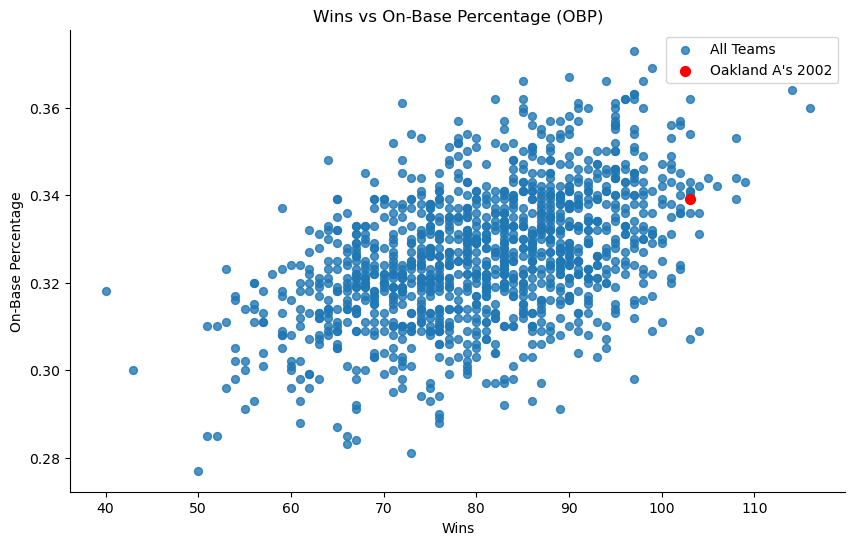

In [8]:
# @title W vs OBP

from matplotlib import pyplot as plt
# Plot for W vs OBP
plt.figure(figsize=(10, 6))
plt.scatter(df['W'], df['OBP'], s=32, alpha=0.8, label='All Teams')
plt.scatter(df_oakland['W'], df_oakland['OBP'], color='red', s=50, label='Oakland A\'s 2002')

plt.title('Wins vs On-Base Percentage (OBP)')
plt.xlabel('Wins')
plt.ylabel('On-Base Percentage')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Oakland A's 2002 had a higher percentage on base percentage compared to most other teams.

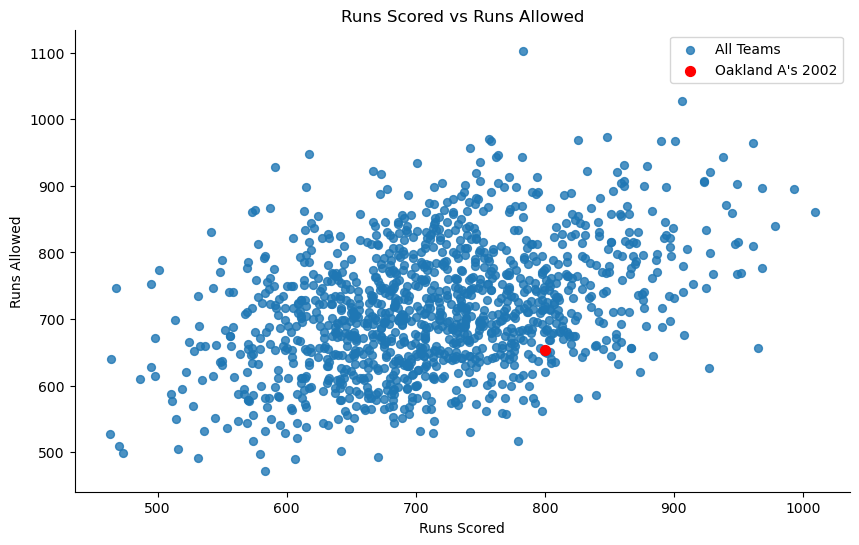

In [10]:
# @title RS vs RA

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['RS'], df['RA'], s=32, alpha=0.8, label='All Teams')
plt.scatter(df_oakland['RS'], df_oakland['RA'], color='red', s=50, label='Oakland A\'s 2002')
plt.title('Runs Scored vs Runs Allowed')
plt.xlabel('Runs Scored')
plt.ylabel('Runs Allowed')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


Oakland A's had a higher runs scored and lower runs allowed.

### RD vs W

/var/folders/wt/qbn89c6x4mlc7d3_sw891vgc0000gn/T/ipykernel_62877/94164262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oakland['RD'] = df_oakland['RS'] - df_oakland['RA']


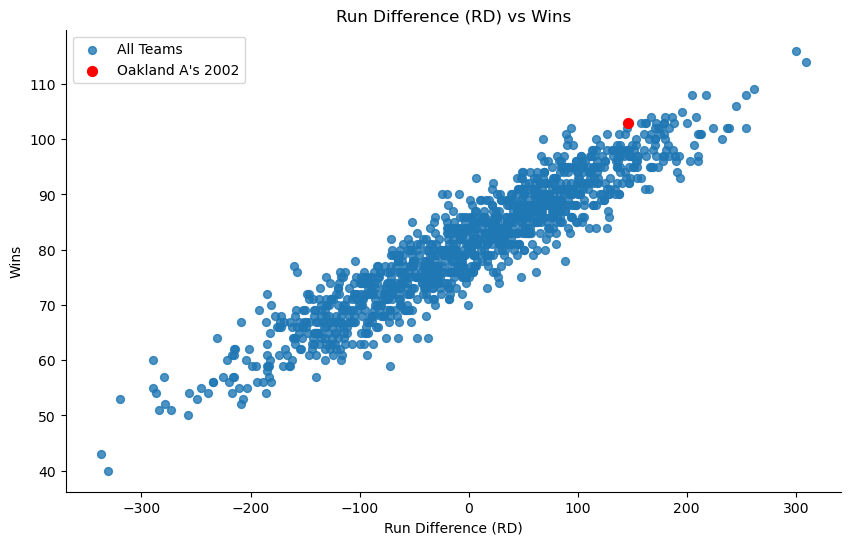

In [13]:
# Recalculate the run difference for all teams and for Oakland A's in case of any changes
df['RD'] = df['RS'] - df['RA']
df_oakland['RD'] = df_oakland['RS'] - df_oakland['RA']

# Plot for RD vs Wins
plt.figure(figsize=(10, 6))
plt.scatter(df['RD'], df['W'], s=32, alpha=0.8, label='All Teams')
plt.scatter(df_oakland['RD'], df_oakland['W'], color='red', s=50, label='Oakland A\'s 2002')
#plt.scatter(oakland_all_years['RD'], oakland_all_years['W'], color='orange', s=50, label='Oakland A\'s')
plt.title('Run Difference (RD) vs Wins')
plt.xlabel('Run Difference (RD)')
plt.ylabel('Wins')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


## Correlation

In [15]:
import numpy as np


print(f"On base percent vs Wins correlation {round(np.corrcoef(df.OBP,df.W)[0,1],2)}")
print(f"Runs Scored vs Wins correlation {round(np.corrcoef(df.RS,df.W)[0,1],2)}")
print(f"Runs Allowed vs Wins correlation {round(np.corrcoef(df.RA,df.W)[0,1],2)}")
print(f"Slugging Percent vs Wins correlation {round(np.corrcoef(df.SLG,df.W)[0,1],2)}")
print(f"Batting Average vs Wins correlation {round(np.corrcoef(df.BA,df.W)[0,1],2)}")
print(f"Playoffs vs Wins correlation {round(np.corrcoef(df.Playoffs,df.W)[0,1],2)}")
print(f"Run Difference vs Wins correlation {round(np.corrcoef(df.RD,df.W)[0,1],2)}")

On base percent vs Wins correlation 0.48
Runs Scored vs Wins correlation 0.51
Runs Allowed vs Wins correlation -0.53
Slugging Percent vs Wins correlation 0.4
Batting Average vs Wins correlation 0.41
Playoffs vs Wins correlation 0.62
Run Difference vs Wins correlation 0.94


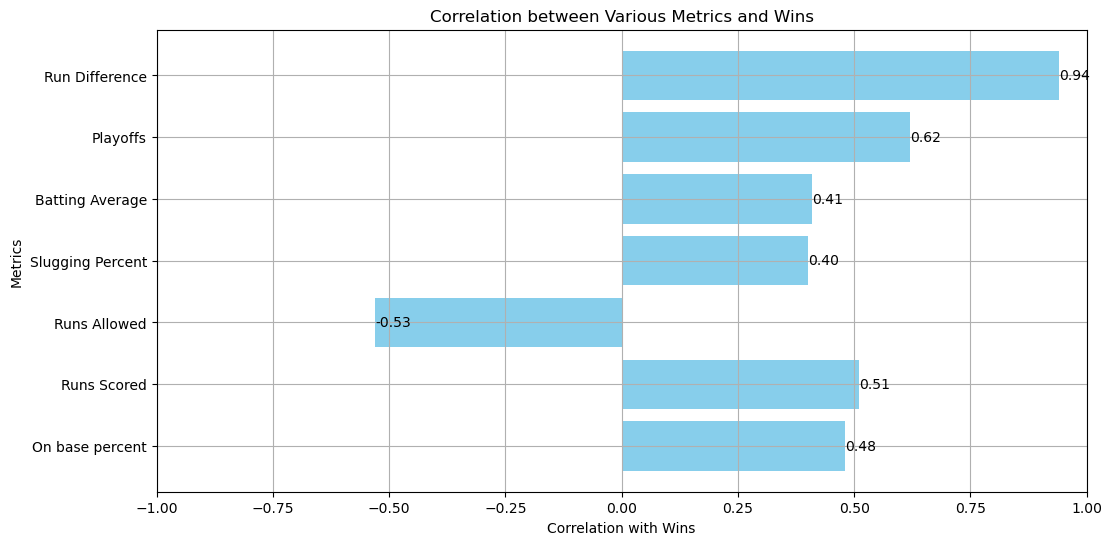

In [16]:
import matplotlib.pyplot as plt

# Data for correlations
metrics = ['On base percent', 'Runs Scored', 'Runs Allowed', 'Slugging Percent', 'Batting Average', 'Playoffs', 'Run Difference']
correlations = [0.48, 0.51, -0.53, 0.4, 0.41, 0.62, 0.94]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(metrics, correlations, color='skyblue')

# Adding the correlation values on the bars
for bar, corr in zip(bars, correlations):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{corr:.2f}', va='center', ha='left', fontsize=10)

plt.xlabel('Correlation with Wins')
plt.ylabel('Metrics')
plt.title('Correlation between Various Metrics and Wins')
plt.xlim(-1, 1)
plt.grid(True)
plt.show()

## Remove Playoff Related Fields

Removing fields surrounding the playoffs to remove post-season bias from the results.

In [18]:
cleaned_df = df.drop(columns=['Playoffs', 'RankSeason', 'RankPlayoffs','W'])

## Data Preparation



In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

# Prepare the data
X = cleaned_df.drop('Label', axis=1).select_dtypes(include=['float64', 'int64'])
y = cleaned_df['Label']

# Remove rows with missing values
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

# Add WP to X_cleaned to keep track of it through the process
X_cleaned['WP'] = cleaned_df['WP']

# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Extract WP for use later before scaling
wp_test = X_test_clean['WP']
X_train_clean = X_train_clean.drop(columns=['WP'])
X_test_clean = X_test_clean.drop(columns=['WP'])

# Normalize the data
scaler_clean = StandardScaler()
X_train_scaled_clean = scaler_clean.fit_transform(X_train_clean)
X_test_scaled_clean = scaler_clean.transform(X_test_clean)


/var/folders/wt/qbn89c6x4mlc7d3_sw891vgc0000gn/T/ipykernel_62877/3734388040.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['WP'] = cleaned_df['WP']


## Training the Models

In [22]:
# Define models and their parameter grids
models = {
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'MLP Classifier': (MLPClassifier(max_iter=1000), {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01]
    })
}

# Train models using GridSearchCV on the cleaned data
model_results_clean = {}
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    grid_search_clean = GridSearchCV(model, params, cv=3, scoring='accuracy')
    grid_search_clean.fit(X_train_scaled_clean, y_train_clean)
    best_model_clean = grid_search_clean.best_estimator_
    y_pred_clean = best_model_clean.predict(X_test_scaled_clean)
    incorrect_indices = (y_pred_clean != y_test_clean)
    incorrect_wps = wp_test[incorrect_indices]
    report_clean = classification_report(y_test_clean, y_pred_clean)
    score = accuracy_score(y_test_clean, y_pred_clean)
    model_results_clean[model_name] = (grid_search_clean.best_params_, report_clean,score,incorrect_wps,grid_search_clean)

Training KNN...
Training Logistic Regression...
Training Naive Bayes...
Training Decision Tree...
Training SVM...
Training MLP Classifier...


## Evaluation

The model's show a high degree of accuracy and they all seem to converge at the same exact value. Perhaps suggesting a potential limitability of the the dataset to fully predict success. Experimentation with more complex models would be interesting to see if they run into this threshold as well.

In [24]:
for model_name, (params, report,score,_,gsm) in model_results_clean.items():
    print(f"\n\n{model_name} Accuracy:{score} Best Parameters: {params}\n")
    print(report)



KNN Accuracy:0.9523809523809523 Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.96      0.96      0.96        48

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



Logistic Regression Accuracy:0.9523809523809523 Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.96      0.96      0.96        48

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



Naive Bayes Accuracy:0.9523809523809523 Best Parameters: {}

              precision    recall  f1-score   support

           0       0.94      0.94 

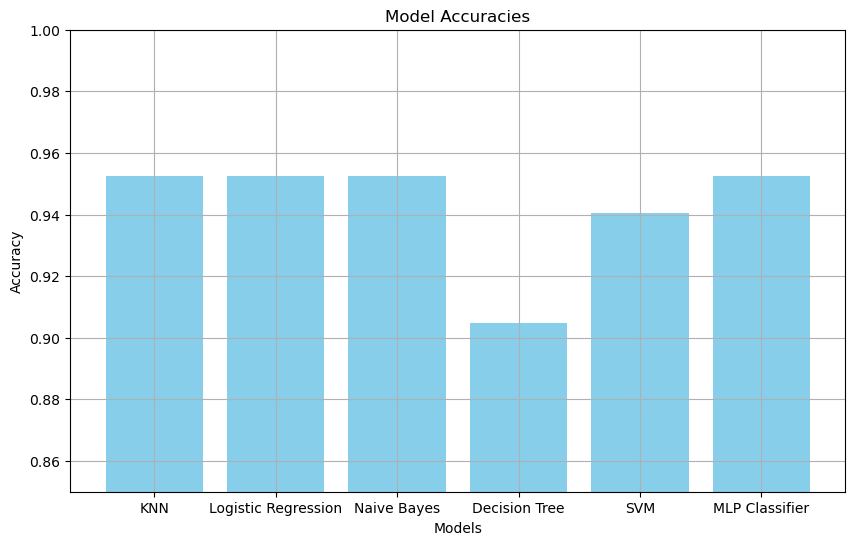

In [25]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
model_names = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'MLP Classifier']
accuracies = [0.9524, 0.9524, 0.9524, 0.9048, 0.9405, 0.9524]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.show()

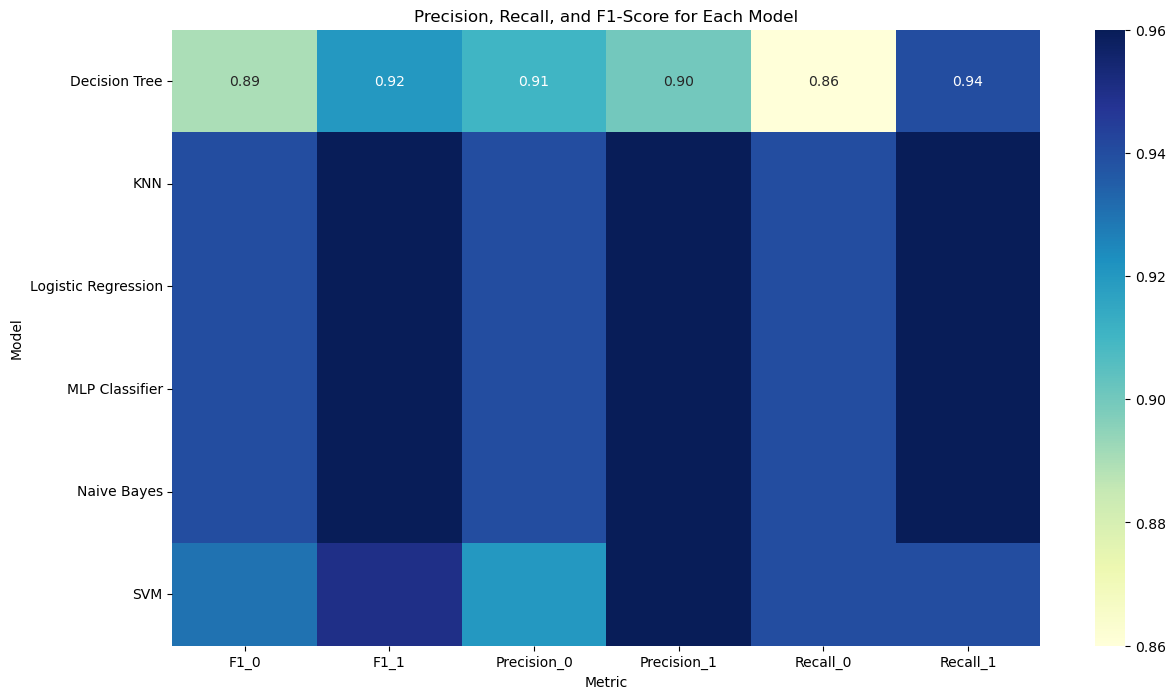

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Model metrics
metrics = {
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'MLP Classifier'],
    'Precision_0': [0.94, 0.94, 0.94, 0.91, 0.92, 0.94],
    'Recall_0': [0.94, 0.94, 0.94, 0.86, 0.94, 0.94],
    'F1_0': [0.94, 0.94, 0.94, 0.89, 0.93, 0.94],
    'Precision_1': [0.96, 0.96, 0.96, 0.90, 0.96, 0.96],
    'Recall_1': [0.96, 0.96, 0.96, 0.94, 0.94, 0.96],
    'F1_1': [0.96, 0.96, 0.96, 0.92, 0.95, 0.96]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a heatmap
plt.figure(figsize=(14, 8))
heatmap_data = metrics_melted.pivot(index='Model', columns='Metric', values='Score')
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Precision, Recall, and F1-Score for Each Model')
plt.show()

### Analyzing Incorrect Predictions

In [28]:
for model_name, (_,_,_,incorrect,_) in model_results_clean.items():
    print(f"incorrect predictions for {model_name}: {incorrect.values}")

incorrect predictions for KNN: [0.5   0.525 0.5   0.543]
incorrect predictions for Logistic Regression: [0.5   0.525 0.5   0.543]
incorrect predictions for Naive Bayes: [0.5   0.525 0.5   0.543]
incorrect predictions for Decision Tree: [0.494 0.5   0.531 0.525 0.5   0.488 0.543 0.475]
incorrect predictions for SVM: [0.506 0.5   0.525 0.5   0.543]
incorrect predictions for MLP Classifier: [0.5   0.525 0.5   0.543]


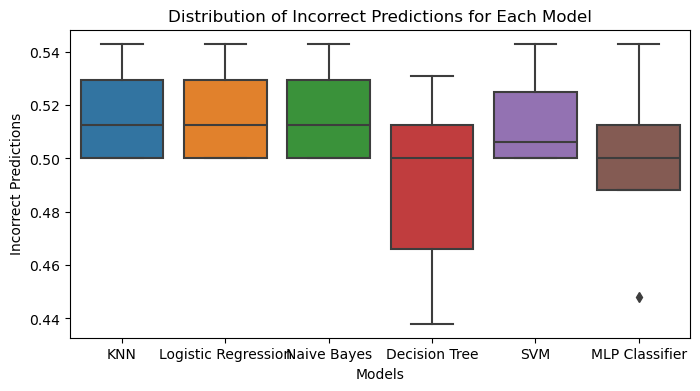

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data for incorrect predictions
incorrect_predictions = {
    'Model': ['KNN', 'KNN', 'KNN', 'KNN',
              'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
              'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes',
              'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
              'SVM', 'SVM', 'SVM', 'SVM', 'SVM',
              'MLP Classifier', 'MLP Classifier', 'MLP Classifier', 'MLP Classifier', 'MLP Classifier', 'MLP Classifier', 'MLP Classifier'],
    'Incorrect Predictions': [0.5, 0.525, 0.5, 0.543,
                              0.5, 0.525, 0.5, 0.543,
                              0.5, 0.525, 0.5, 0.543,
                              0.5, 0.531, 0.525, 0.5, 0.438, 0.475, 0.457,
                              0.506, 0.5, 0.525, 0.5, 0.543,
                              0.488, 0.5, 0.525, 0.448, 0.5, 0.543, 0.488]
}

# Convert to DataFrame
incorrect_predictions_df = pd.DataFrame(incorrect_predictions)

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Model', y='Incorrect Predictions', data=incorrect_predictions_df)
plt.xlabel('Models')
plt.ylabel('Incorrect Predictions')
plt.title('Distribution of Incorrect Predictions for Each Model')
plt.show()

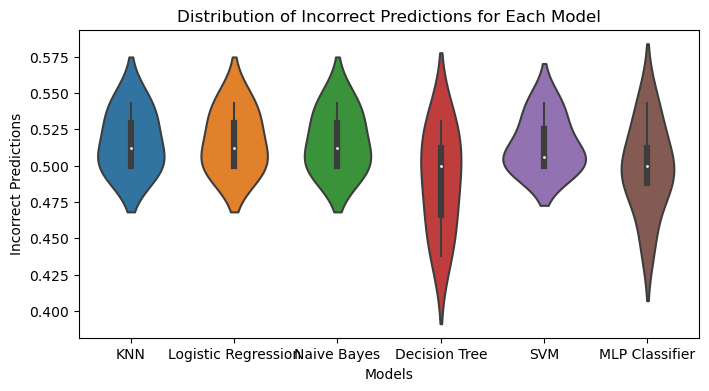

In [30]:
# Create a violin plot
plt.figure(figsize=(8, 4))
sns.violinplot(x='Model', y='Incorrect Predictions', data=incorrect_predictions_df)
plt.xlabel('Models')
plt.ylabel('Incorrect Predictions')
plt.title('Distribution of Incorrect Predictions for Each Model')
plt.show()

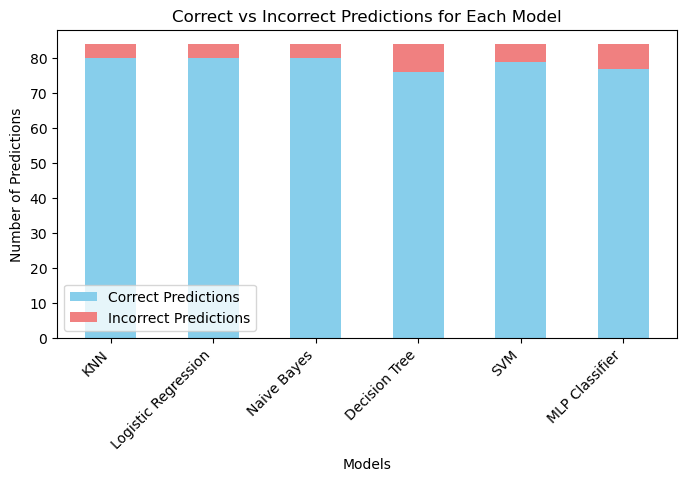

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for correct and incorrect predictions
model_names = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'MLP Classifier']
correct_predictions = [80, 80, 80, 76, 79, 77]
incorrect_predictions = [4, 4, 4, 8, 5, 7]

# Plotting the stacked bar chart
plt.figure(figsize=(8, 4))
bar_width = 0.5
ind = np.arange(len(model_names))

plt.bar(ind, correct_predictions, bar_width, label='Correct Predictions', color='skyblue')
plt.bar(ind, incorrect_predictions, bar_width, bottom=correct_predictions, label='Incorrect Predictions', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Number of Predictions')
plt.title('Correct vs Incorrect Predictions for Each Model')
plt.xticks(ind, model_names, rotation=45, ha='right')
plt.legend()
plt.show()

## Okland A's 2002 Success

Use all the train model's to test how predictable the oakland A's success was. It appears that all models succesfully predict oakland A's success.


In [33]:
# Assuming df is the complete DataFrame that includes the Oakland A's 2002 data
season = 2002
df_2002 = df[df['Year'] == season]
df_oakland = df_2002[df_2002['Team'] == 'OAK']
df_oakland = df_oakland.drop(columns=['Playoffs', 'RankSeason', 'RankPlayoffs','W','WP'])

# Assuming 'cleaned_df' includes a 'Year' column and that df_oakland is a similar structure
# Selecting features from the Oakland 2002 row as per your feature selection earlier
X_oakland = df_oakland.drop('Label', axis=1).select_dtypes(include=['float64', 'int64'])

# Normalize the Oakland 2002 data using the same scaler used for the training data
# Note: It is crucial that df_oakland has no missing values in the columns used by the model.
X_oakland_scaled = scaler_clean.transform(X_oakland)  # Using the scaler fitted on the training data

# Predict using each trained model
oakland_predictions = {}
for model_name, (_, _, _,_,gsm) in model_results_clean.items():
    y_pred_oakland = gsm.predict(X_oakland_scaled)
    oakland_predictions[model_name] = y_pred_oakland

# Print the predictions for each model
for model_name, prediction in oakland_predictions.items():
    print(f"{model_name} Prediction for Oakland A's 2002: {prediction}")


KNN Prediction for Oakland A's 2002: [1]
Logistic Regression Prediction for Oakland A's 2002: [1]
Naive Bayes Prediction for Oakland A's 2002: [1]
Decision Tree Prediction for Oakland A's 2002: [1]
SVM Prediction for Oakland A's 2002: [1]
MLP Classifier Prediction for Oakland A's 2002: [1]


## Analysis of Results

The data is retrospective, looking at the stats after the season. While many of the more obvious features that would suggest seasonal success are removed, the remaining take still contains a look-back bias where you would only know the "Runs Score" after a season has completed.

Due to this, our models are able to learn very well the patterns of a succesfull season and can predict pretty accurately if a season has a positive win record. This is liekly due to the look-back bias previously discussed where the model already can see how well a team performed in the season.

It is interesting that all the models seem to converge at the same 95.24% accuracy. This is suggesting some variablity in performance that might not be reflected in the data or the simplicity of the models might have trouble capturing the more nuanced differences in data. This is also likely due to the limited dataset size. It appears that each incorrect predictions seems to be on the edge cases where the wins are almost equal to the losses making it more difficult to predict the success.